Data Description: 
The data at hand contains medical costs of people characterized by certain attributes. 

Domain: Healthcare

Context:  
Leveraging customer information is paramount for most businesses.In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have. 

Attribute Information: 
•	age: age of primary beneficiary 
•	sex: insurance contractor gender, female, male 
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 
•	children: Number of children covered by health insurance / Number of dependents 
•	smoker: Smoking 
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. 
•	charges: Individual medical costs billed by health insurance. 

Learning Outcomes: 
•	Exploratory Data Analysis 
•	Practicing statistics using Python 
•	Hypothesis testing 

Objective: We want to see if we can dive deep into this data to find some valuable insights


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as sci

In [66]:
#1. read data from csv
#returns a panda dataframe
medical_cost_data=pd.read_csv("insurance.csv")

In [67]:
medical_cost_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [68]:
#Shape of the data (2 marks)
medical_cost_data.shape


(1338, 7)

In [69]:
print('Insight: The dataset has 1338 rows and 7 columns')

Insight: The dataset has 1338 rows and 7 columns


In [70]:
#Data type of each attribute (2 marks)
print(medical_cost_data.dtypes);

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


Insights on the above cell:
The below columns can be categorised into the below data types:
1. age - Discrete
2. sex - Categorical(Symmetric binary)
3. bmi - Continuous
4. children - Normally discrete but categorical in this case since the no of beneficiaries are divided on the basis of the total number of children they have.
5. smoker - Categorical(Asymmetric binary)
6. region - Categorical(Nominal)
7. charges - Discrete

In [71]:
#Checking the presence of missing values (3 marks)
medical_cost_data.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [72]:
print('Insight: This dataset has no null values.')

Insight: This dataset has no null values.


In [73]:
#5 point summary of numerical attributes (3 marks)
five_point_summary_list={'mean':[medical_cost_data['age'].mean(),medical_cost_data['bmi'].mean(),medical_cost_data['charges'].mean()],
                    'median':[medical_cost_data['age'].median(),medical_cost_data['bmi'].median(),medical_cost_data['charges'].median()],
                    'std':[medical_cost_data['age'].std(),medical_cost_data['bmi'].std(),medical_cost_data['charges'].std()],
                    'min':[medical_cost_data['age'].min(),medical_cost_data['bmi'].min(),medical_cost_data['charges'].min()],
                    'max':[medical_cost_data['age'].max(),medical_cost_data['bmi'].max(),medical_cost_data['charges'].max()]}
five_point_summary_df=pd.DataFrame(data=five_point_summary_list, index=['age', 'bmi','charges'])
five_point_summary_df

,mean,median,std,min,max
age,39.207025,39.000,14.049960,18.0000,64.00000
bmi,30.663397,30.400,6.098187,15.9600,53.13000
charges,13270.422265,9382.033,12110.011237,1121.8739,63770.42801


In [74]:
print('Insights: Age will follow uniform distribution since mean=median but standard deviation is high. BMI follows a standard normal distribution because mean=median.Charges follows a distribution which is skewed to the right since mean>median. ')

Insights: Age will follow uniform distribution since mean=median but standard deviation is high. BMI follows a standard normal distribution because mean=median.Charges follows a distribution which is skewed to the right since mean>median. 


C:\Users\Soumita\AppData\Local\Temp\ipykernel_2180\4242153933.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_cost_data['age'])


<Axes: xlabel='age', ylabel='Density'>

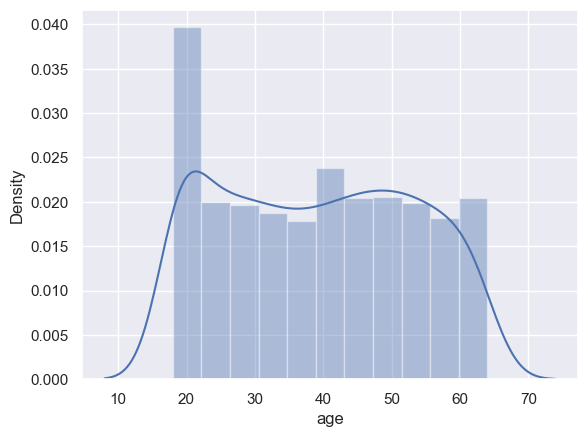

In [75]:
#Distribution of age column(4 marks)
sns.distplot(medical_cost_data['age'])

In [76]:
print('Insights: Age - The age column follows a uniform distribution. Approximately equal number of beneficiaries in this dataset belong to age group of 20 to 60 years.Mean is approximately equal to median.')

Insights: Age - The age column follows a uniform distribution. Approximately equal number of beneficiaries in this dataset belong to age group of 20 to 60 years.Mean is approximately equal to median.


C:\Users\Soumita\AppData\Local\Temp\ipykernel_2180\1321064283.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_cost_data['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

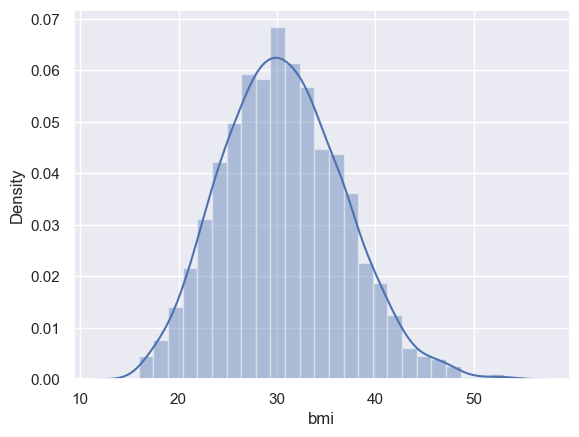

In [77]:
#Distribution of bmi column
sns.distplot(medical_cost_data['bmi'])

In [78]:
print('Insights: bmi - The age column follows a standard normal distribution.This means  that bmi of approximately 68% of the beneficiaries fall in 1 standard deviation of the mean.')

Insights: bmi - The age column follows a standard normal distribution.This means  that bmi of approximately 68% of the beneficiaries fall in 1 standard deviation of the mean.


C:\Users\Soumita\AppData\Local\Temp\ipykernel_2180\738985089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_cost_data['charges'])


<Axes: xlabel='charges', ylabel='Density'>

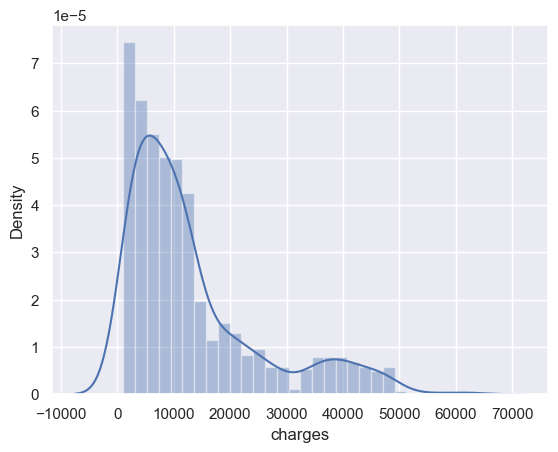

In [79]:
#Distribution of charges column
sns.distplot(medical_cost_data['charges'])

In [80]:
print('Insights: charges - The distribution of charges column is skewed towards the right.' )

Insights: charges - The distribution of charges column is skewed towards the right.


In [81]:
#Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)
medical_cost_data.skew(axis = 0, skipna = True)

C:\Users\Soumita\AppData\Local\Temp\ipykernel_2180\1211566599.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medical_cost_data.skew(axis = 0, skipna = True)


age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [82]:
print('Insights: 1)Age column- little or no skewness, which means the mean is approximately equal to median.2)Bmi column-slightly skewed towards the right, which means mean is slightly greater than the median. 3) Charges column - heavily skewed towards the right, which means the mean is much greater than the median.')

Insights: 1)Age column- little or no skewness, which means the mean is approximately equal to median.2)Bmi column-slightly skewed towards the right, which means mean is slightly greater than the median. 3) Charges column - heavily skewed towards the right, which means the mean is much greater than the median.


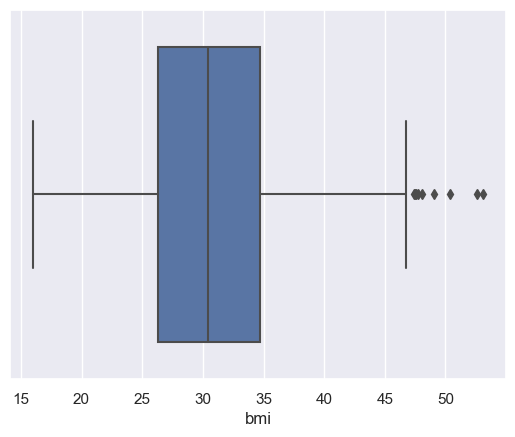

In [83]:
#Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns (4 marks)
sns.boxplot( x=medical_cost_data["bmi"] );

In [84]:
#function to calculate lower and upper range of boxplot
def quartile_data(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [85]:
lowerbound,upperbound = quartile_data(medical_cost_data["bmi"] )
medical_cost_data[(medical_cost_data["bmi"] < lowerbound) | (medical_cost_data["bmi"] > upperbound)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [86]:
print('Insights: From the above boxplot we can see that 9 beneficiaries are considered as outliers whose bmi is greater than sum of 1.5 times the interquartile range and the upper quartile.')

Insights: From the above boxplot we can see that 9 beneficiaries are considered as outliers whose bmi is greater than sum of 1.5 times the interquartile range and the upper quartile.


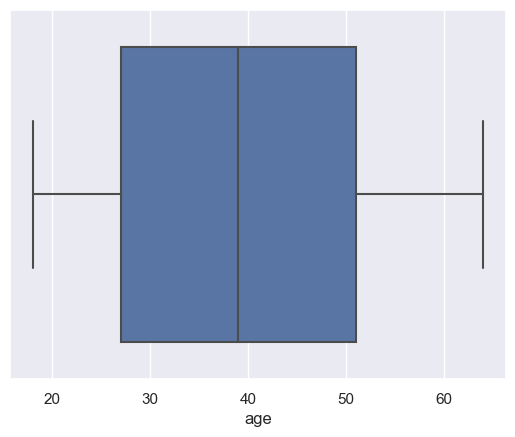

In [87]:
sns.boxplot( x=medical_cost_data["age"] );

In [88]:
lowerbound,upperbound = quartile_data(medical_cost_data["age"] )
medical_cost_data[(medical_cost_data["age"] < lowerbound) | (medical_cost_data["age"] > upperbound)]

,age,sex,bmi,children,smoker,region,charges


In [89]:
print('Insights: No outliers are found in the age column.')

Insights: No outliers are found in the age column.


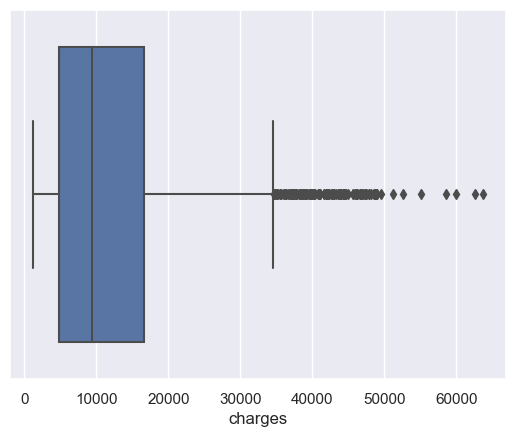

In [90]:
sns.boxplot( x=medical_cost_data["charges"] );

In [91]:
lowerbound,upperbound = quartile_data(medical_cost_data["charges"] )
len(medical_cost_data[(medical_cost_data["charges"] < lowerbound) | (medical_cost_data["charges"] > upperbound)])

139

In [92]:
print('Insights: 139 beneficiaries are outliers whose individual medical costs billed by health insurance are greater than sum of 1.5 times the interquartile range and the upper quartile.')

Insights: 139 beneficiaries are outliers whose individual medical costs billed by health insurance are greater than sum of 1.5 times the interquartile range and the upper quartile.


<Axes: >

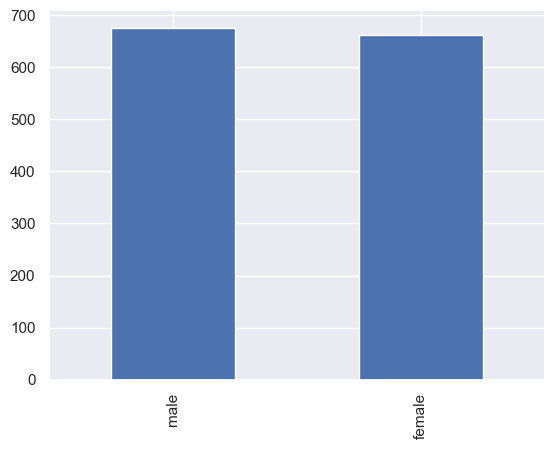

In [93]:
#Distribution of categorical columns (include children) (4 marks)
#sex
medical_cost_data['sex'].value_counts().plot(kind='bar')


In [94]:
print('There are approximately equal number of male and female beneficiaries in the dataset.')

There are approximately equal number of male and female beneficiaries in the dataset.


<Axes: >

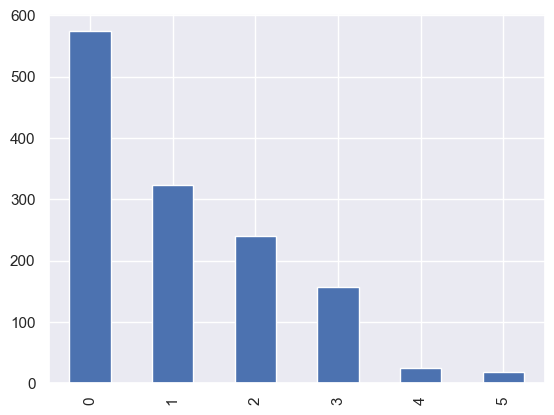

In [95]:
#children
medical_cost_data['children'].value_counts().plot(kind='bar')

In [96]:
 print('Insights-The maximum number of beneficiaries have no children, and the number of beneficiaries who have greater number of children keeps decreasing.')

Insights-The maximum number of beneficiaries have no children, and the number of beneficiaries who have greater number of children keeps decreasing.


<Axes: >

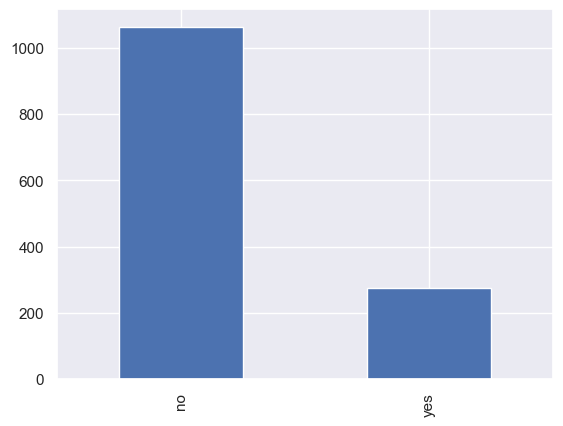

In [97]:
#smoker
medical_cost_data['smoker'].value_counts().plot(kind='bar')

In [98]:
print('The number of beneficiaries who do not smoke are comparatively much more than those of them who smoke.')

The number of beneficiaries who do not smoke are comparatively much more than those of them who smoke.


<Axes: >

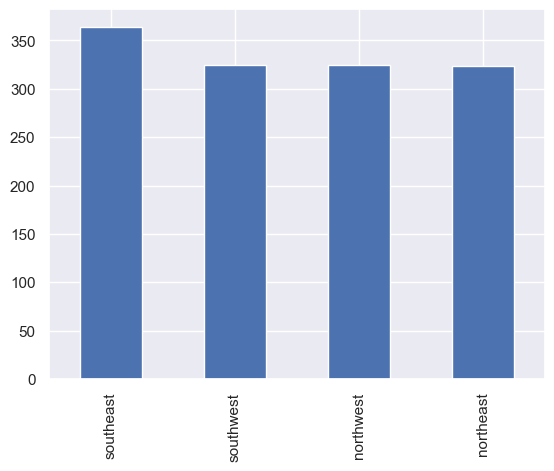

In [99]:
#region
medical_cost_data['region'].value_counts().plot(kind='bar')

In [100]:
print('From the above graph we see that, more than 350 beneficiaries stay in the southeast region and approximately equal number of others(325 approx in each region) are equally distributed in the southwest, northwest and northeast regions')

From the above graph we see that, more than 350 beneficiaries stay in the southeast region and approximately equal number of others(325 approx in each region) are equally distributed in the southwest, northwest and northeast regions


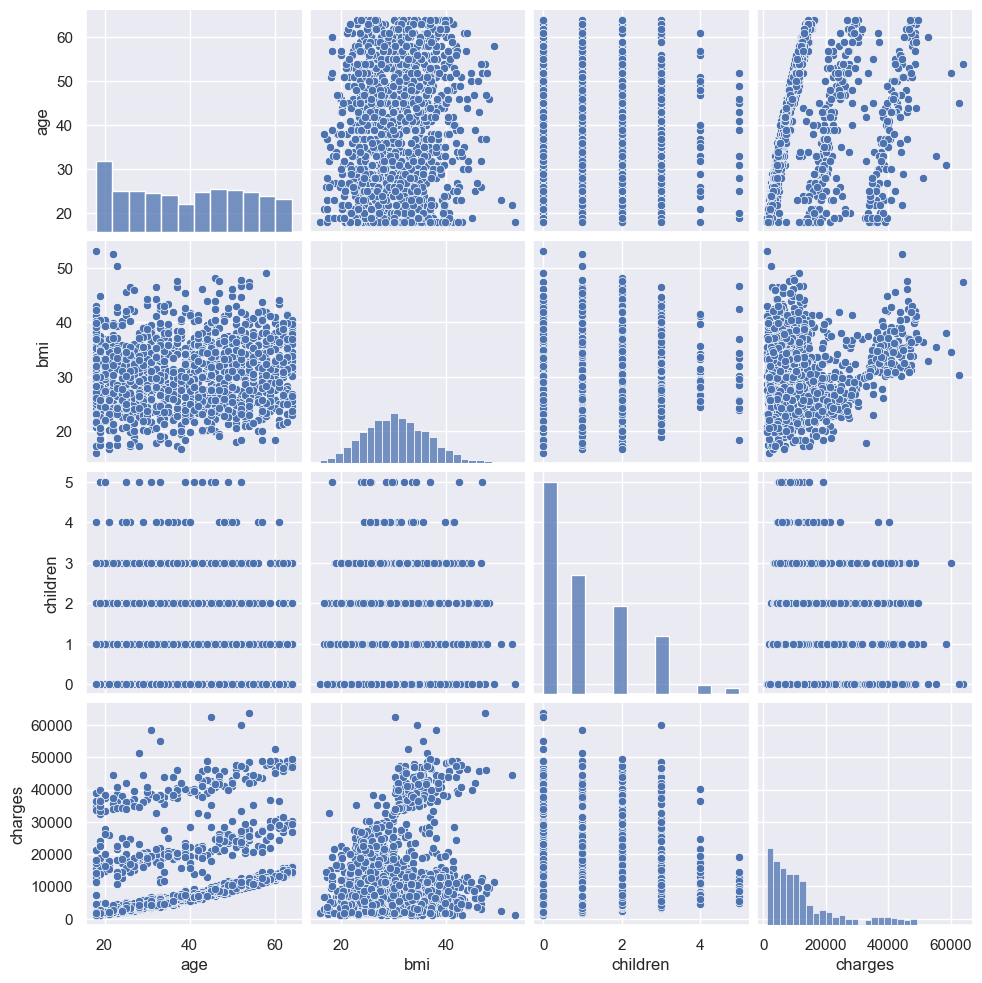

In [101]:
#Pair plot that includes all the columns of the data frame (4 marks)
sns.pairplot(medical_cost_data)

In [102]:
print('Insights-1. Since smoker, region and sex are not numeric, hence they have been excluded from the pairplot. 2. There is no relationship between age and bmi and age and children. 3. Charges increases as age increases.4.Charges increases for smokers than non smokers.')

Insights-1. Since smoker, region and sex are not numeric, hence they have been excluded from the pairplot. 2. There is no relationship between age and bmi and age and children. 3. Charges increases as age increases.4.Charges increases for smokers than non smokers.


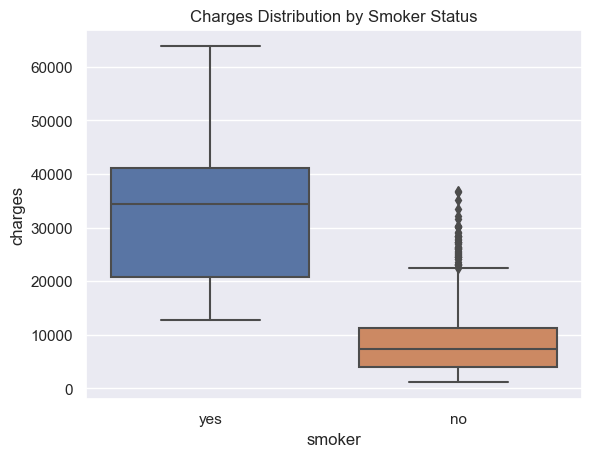

In [103]:
#Do charges of people who smoke differ significantly from the people who don't? (7 marks)
sns.boxplot(x=medical_cost_data['smoker'], y=medical_cost_data['charges'])
plt.title('Charges Distribution by Smoker Status')
plt.show()

In [107]:
print('Insights: Clearly, from the boxplot we see that for smokers the charges are more compared to that of non smokers.But we need to check statistically how much is the difference.')

Insights: Clearly, from the boxplot we see that for smokers the charges are more compared to that of non smokers.But we need to check statistically how much is the difference.


In [105]:
#null hypothesis
HO='Charges claimed by smokers and non smokers are same'
#alternate hypothesis
HA='Charges claimed by smokers and non smokers vary significantly'

#Segregating the smokers and non smokers in different groups:

group_smokers_charges = np.array(medical_cost_data[medical_cost_data.smoker == 'yes'].charges)
group_nonsmokers_charges = np.array(medical_cost_data[medical_cost_data.smoker == 'no'].charges)

#performing the t-test
t, p_value  = sci.ttest_ind(group_smokers_charges,group_nonsmokers_charges, axis = 0)

if p_value < 0.05:
    print(f'{HA} as the p_value ({p_value}) < 0.05. We reject the null hypothesis.')
else:
    print(f'{HO} as the p_value ({p_value}) > 0.05. We accept the null hypothesis.')

Charges claimed by smokers and non smokers vary significantly as the p_value (8.271435842179102e-283) < 0.05. We reject the null hypothesis.


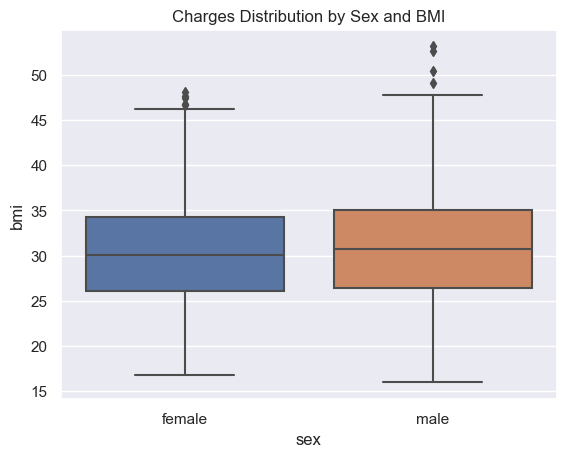

In [108]:
#Does bmi of males differ significantly from that of females? (7 marks)
sns.boxplot(x=medical_cost_data['sex'], y=medical_cost_data['bmi'])
plt.title('Charges Distribution by Sex and BMI')
plt.show()

In [109]:
print('Insights: The boxplot shows that there is hardly any difference in bmi between females and males. Now lets prove it statistically.')

Insights: The boxplot shows that there is hardly any difference in bmi between females and males. Now lets prove it statistically.


In [110]:
#null hypothesis
HO='Bmi of males and females are the same'
#alternate hypothesis
HA='Bmi of males and females vary significantly'

#Segregating the bmi of males and females in different groups:

group_bmi_males = np.array(medical_cost_data[medical_cost_data.sex == 'male'].bmi)
group_bmi_females = np.array(medical_cost_data[medical_cost_data.sex == 'female'].bmi)

#performing the t-test
t, p_value  = sci.ttest_ind(group_bmi_males,group_bmi_females, axis = 0)

if p_value < 0.05:
    print(f'{HA} as the p_value ({p_value.round()}) < 0.05. We reject the null hypothesis.')
else:
    print(f'{HO} as the p_value ({p_value.round(1)}) > 0.05. We accept the null hypothesis.')

Bmi of males and females are the same as the p_value (0.1) > 0.05. We accept the null hypothesis.


In [112]:
#Is the proportion of smokers significantly different in different genders? (7 marks)
#null hypothesis
HO='Proportion of smokers across genders are the same'
#alternate hypothesis
HA='Proportion of smokers across genders vary significantly'

#Segregating male and female smokers in different groups:

male_smokers = medical_cost_data[medical_cost_data['sex'] == 'male'].smoker.value_counts()[1]
female_smokers = medical_cost_data[medical_cost_data['sex'] == 'female'].smoker.value_counts()[1]

#count of males and females

count_males = medical_cost_data.sex.value_counts()[0] 
count_females = medical_cost_data.sex.value_counts()[1]

print([male_smokers, female_smokers ] , [count_males,count_females])
print(f' Proportion of smokers in  males,females = {round(159/676,2)}% ,{round(115/662,2)}% respectively')


from statsmodels.stats.proportion import proportions_ztest

#performing the z test
stat, p_value = proportions_ztest([male_smokers,female_smokers] , [count_males,count_females])

#Insights
if p_value < 0.05:
     print( f'{HA} as the p_value ({p_value.round(3)}) < 0.05. We reject the null hypothesis.')
else:
    print( f'{HO} as the p_value ({p_value.round(3)}) > 0.05. We accept the null hypothesis.')

[159, 115] [676, 662]
 Proportion of smokers in  males,females = 0.24% ,0.17% respectively
Proportion of smokers across genders vary significantly as the p_value (0.005) < 0.05. We reject the null hypothesis.


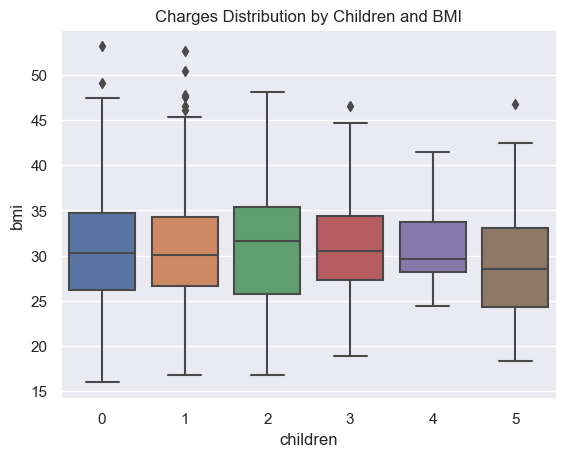

In [114]:
#Is the distribution of bmi across women with no children, one child and two children, the same? (7 marks)
sns.boxplot(x=medical_cost_data['children'], y=medical_cost_data['bmi'])
plt.title('Charges Distribution by Children and BMI')
plt.show()

In [116]:
print('Insights: The boxplots shows that there is hardly any difference in bmi irrespective of the number of children.Now lets prove it statistically.')

Insights: The boxplots shows that there is hardly any difference in bmi irrespective of the number of children.Now lets prove it statistically.


In [117]:
#null hypothesis
HO='BMI of women remains same irrespective of the number of children they have.'
#alternate hypothesis
HA='BMI of women vary significantly on number of children they have.'

import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('children ~ bmi', data = medical_cost_data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq      df         F   PR(>F)
bmi          0.316291     1.0  0.217522  0.64101
Residual  1942.629150  1336.0       NaN      NaN


In [118]:
print('Since p_value=0.64 > 0.05 from the above table BMI of women remains same irrespective of the number of children they have. We accept the null hypothesis.')

Since p_value=0.64 > 0.05 from the above table BMI of women remains same irrespective of the number of children they have. We accept the null hypothesis.
